In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zip_file = ZipFile('data/f1db_csv.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

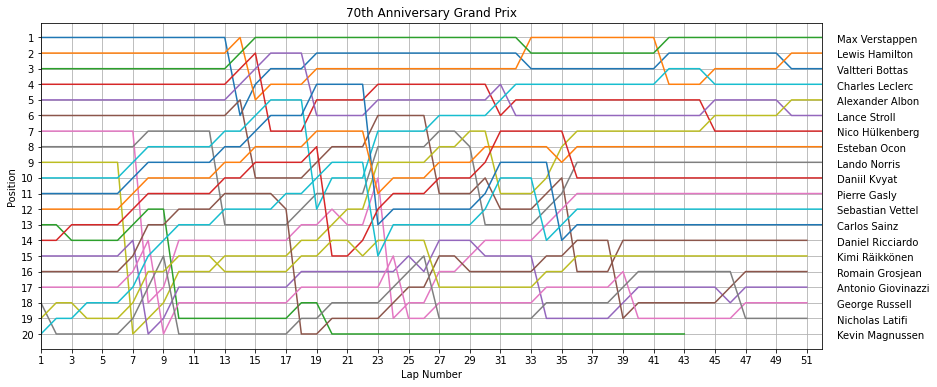

In [2]:
# TODO: Pilot list shows the las

races_df = dfs["races.csv"]
raceId = races_df[(races_df["year"] == 2020) & (races_df["round"] == 5)]["raceId"]

lap_times_df = dfs["lap_times.csv"]
race = lap_times_df[lap_times_df["raceId"] == int(raceId)]
driver_list = race["driverId"].drop_duplicates()

drivers_df = dfs["drivers.csv"]

plt.figure(figsize=(14, 6))    
ax = plt.subplot(111)    

for driver in driver_list:
    x = race[race["driverId"] == driver]["lap"]
    y = race[race["driverId"] == driver]["position"]
    plt.plot(x, y)
    y_pos = race[race["driverId"] == driver]["position"].values[-1] + 0.3
    driver_raw = drivers_df[drivers_df["driverId"] == driver]
    driver_name = driver_raw["forename"] + ' ' + driver_raw["surname"]
    plt.text(race["lap"].values.max() + 1, y_pos, driver_name.iloc[0])

plt.gca().invert_yaxis()
plt.grid()

plt.xticks(np.arange(race["lap"].values.min(), race["lap"].values.max()+1, 2.0))
plt.yticks(np.arange(race["lap"].values.min(), 21, 1.0))

plt.xlim(race["lap"].values.min(), race["lap"].values.max())

plt.title(races_df[races_df["raceId"] == int(raceId)]["name"].iloc[0])
plt.xlabel('Lap Number')
plt.ylabel('Position')

plt.show()